# TODO add some exercises

# Case Study: Human Airway Smooth Muscle Transcriptome Changes in Response to Asthma Medications
> Paper: [Himes, Blanca E., et al. PloS one (2014)](https://pubmed.ncbi.nlm.nih.gov/24926665/)
>
> Data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52778

#### Rationale
Asthma is a chronic inflammatory airway disease. The most common medications used for its treatment are β2-agonists and glucocorticosteroids, and one of the primary tissues that these drugs target in the treatment of asthma is the airway smooth muscle. We used RNA-Seq to characterize the **human airway smooth muscle (HASM)** transcriptome at baseline and under three asthma treatment conditions.
#### Methods
The Illumina TruSeq assay was used to prepare 75bp paired-end libraries for HASM cells from four white male donors under four treatment conditions: 1) no treatment; 2) treatment with a β2-agonist (i.e. Albuterol, 1μM for 18h); 3) treatment with a glucocorticosteroid (i.e. Dexamethasone (Dex), 1μM for 18h); 4) simultaneous treatment with a β2-agonist and glucocorticoid, and the libraries were sequenced with an Illumina Hi-Seq 2000 instrument.

Today's goal: Learn how to produce commonly used plots in basic gene expression analysis (simplified).


1. overview plots

Python plots
https://python-graph-gallery.com/
seaborn
matplotlib
venn diagrams

Common plots in bioinformatics
- barplots, pie charts, venn diagrams
    - # of DE genes
- scatter plots, density plots
    - compare gene expression between 2 samples (e.g. RNA-seq)
    - compare 2 variables between many samples (e.g. scRNA-seq)
- histograms, KDE, boxplot, violin
    - gene counts distribution
- heatmaps, dendrograms
    - for looking at sample similarity and gene similarity simultaneously

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_table('data/asm_dex_labels.txt', index_col='sample')['condition']

In [4]:
labels

sample
A    untreated
B          Dex
E    untreated
F          Dex
I    untreated
J          Dex
M    untreated
N          Dex
Name: condition, dtype: object

In [3]:
counts = pd.read_table('data/asm_dex_counts.txt', index_col='Name')

In [5]:
counts

,A,B,E,F,I,J,M,N
Name,,,,,,,,
ENSG00000000003,667,434,862,401,1133,1050,750,562
ENSG00000000005,0,0,0,0,0,0,0,0
ENSG00000000419,430,488,556,334,529,719,378,468
ENSG00000000457,256,226,276,174,288,358,248,235
ENSG00000000460,56,52,29,30,63,53,68,56
...,...,...,...,...,...,...,...,...
ENSG00000273487,3,4,0,9,6,4,3,8
ENSG00000273488,5,3,5,3,3,10,6,11
ENSG00000273489,0,0,0,2,1,0,0,0


Filter genes for min counts at least 10

In [6]:
(counts.sum(axis=1) < 10).sum()

37368

In [7]:
counts = counts.loc[counts.sum(axis=1) > 10]

In [8]:
samples = counts.columns

In [9]:
genes = counts.index

# Count distribution between samples

In [10]:
n_counts = counts.sum()

Text(0, 0.5, 'Read counts')

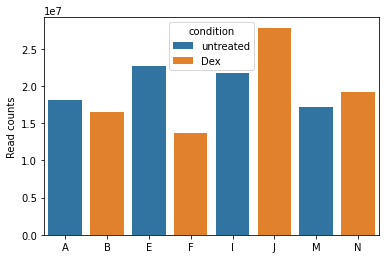

In [11]:
sns.barplot(x=samples, y=n_counts, hue=labels, dodge=False)
plt.ylabel('Read counts') # change scientific notation?

---

1. Data distribution

Gene expression data is represented in the form of read counts in a table, where columns are samples and rows are genes. 

<AxesSubplot:xlabel='A', ylabel='Count'>

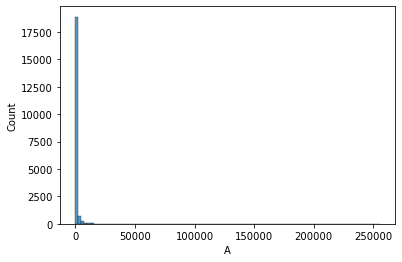

In [426]:
sns.histplot(data=counts['A'], bins=100)

<AxesSubplot:>

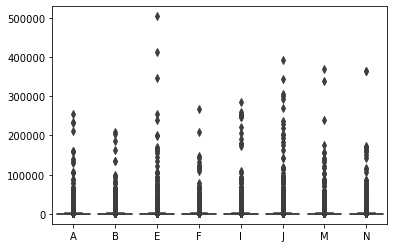

In [428]:
sns.boxplot(data=counts)

<AxesSubplot:ylabel='Name'>

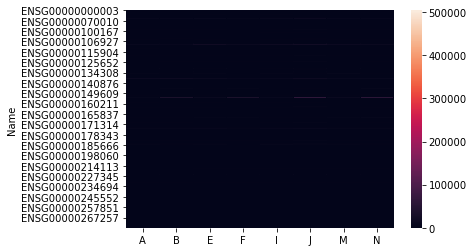

In [224]:
sns.heatmap(data=counts)

In [226]:
log_counts = np.log2(counts+1)

<AxesSubplot:xlabel='A', ylabel='Count'>

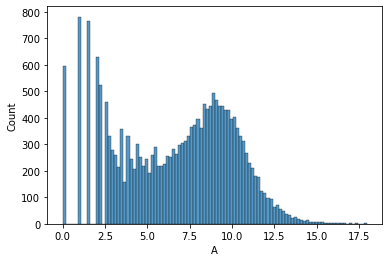

In [427]:
sns.histplot(data=log_counts['A'], bins=100)

<AxesSubplot:>

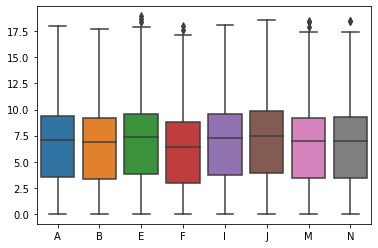

In [227]:
sns.boxplot(data=log_counts)

<AxesSubplot:ylabel='Name'>

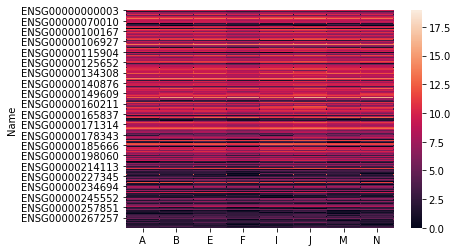

In [415]:
sns.heatmap(data=log_counts)

<AxesSubplot:>

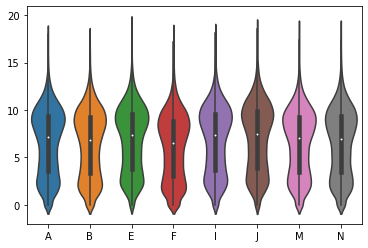

In [421]:
sns.violinplot(data=log_counts)

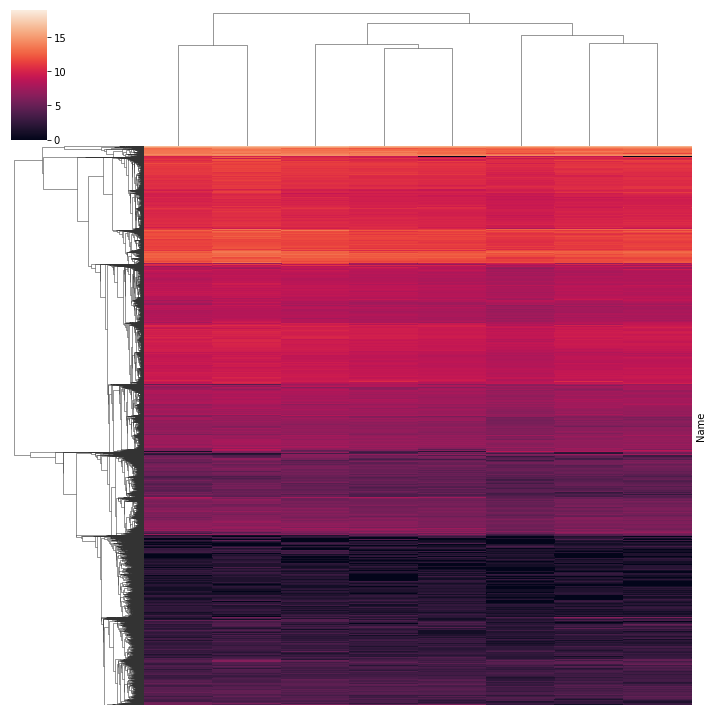

In [229]:
sns.clustermap(data=log_counts, xticklabels=False, yticklabels=False)

In [231]:
palette = sns.color_palette('tab10')
label2color = zip(labels.unique(), palette)
label2color = dict(label2color)

In [234]:
label_color = labels.map(label2color)

No handles with labels found to put in legend.


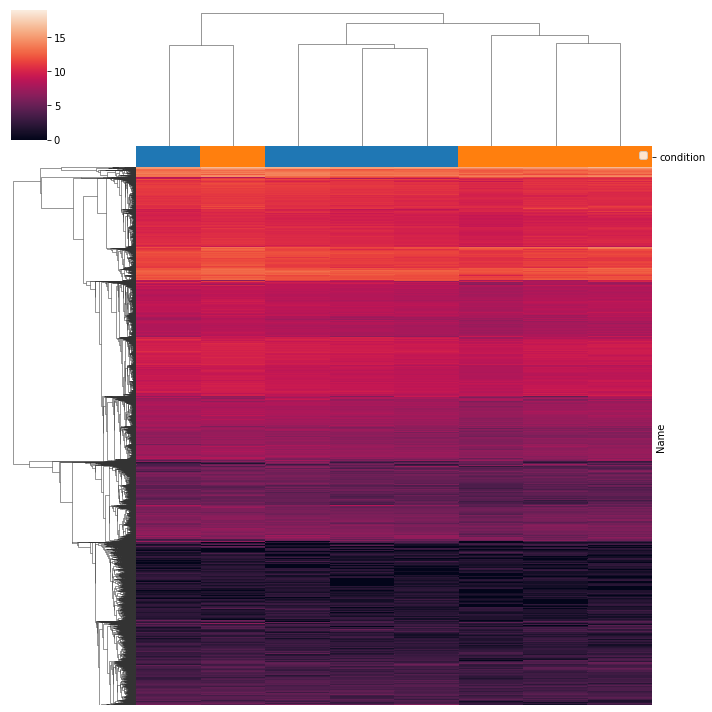

In [235]:
ax = sns.clustermap(data=log_counts, xticklabels=False, yticklabels=False, col_colors=label_color)
ax.ax_col_colors.legend()

# Untreated vs untreated (A vs E)

In [289]:
from scipy import stats

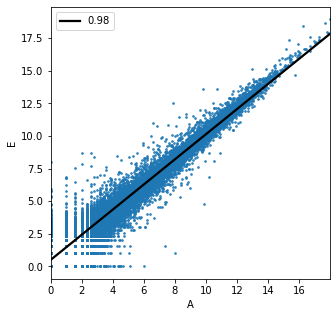

In [312]:
plt.figure(figsize=(5,5))
sns.regplot(data=log_counts, x='A', y='E', scatter_kws={'s': 3}, line_kws={'color': 'black'})

r, p_value = stats.pearsonr(log_counts['A'], log_counts['E'])
plt.legend([f'{r:.2f}'])

What range of correlation values should you see?

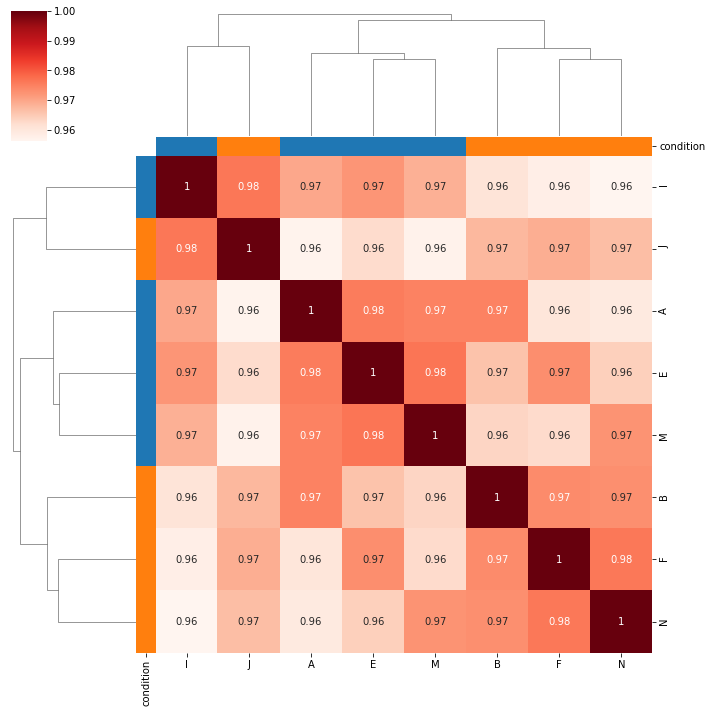

In [270]:
sns.clustermap(log_counts.corr(), col_colors=label_color, row_colors=label_color, annot=True, cmap='Reds')

In [236]:
from sklearn.decomposition import PCA

# TODO explain thoroughly

In [240]:
pca_df = PCA().fit_transform(log_counts.T)

In [241]:
pca_df = pd.DataFrame(pca_df)

In [246]:
pca_df['condition'] = labels.values

In [247]:
pca_df.columns = pca_df.columns.astype(str)

In [248]:
pca_df

,0,1,2,3,4,5,6,7,condition
0,-4.409733,-59.217333,42.746981,-12.299452,2.395731,-23.646892,-28.988208,9.420259e-14,untreated
1,42.779658,11.865874,57.538127,-24.251491,8.777659,20.727979,26.979960,9.420259e-14,Dex
2,-32.356409,-33.827589,-20.293903,37.618532,51.629978,14.910411,4.628768,9.420259e-14,untreated
3,89.999717,29.217368,-3.046843,54.849516,-15.682613,-12.071229,-4.235847,9.420259e-14,Dex
4,-69.641965,-3.276477,3.657719,16.865105,-46.394370,29.025853,-8.075709,9.420259e-14,untreated
5,-75.880646,72.293567,4.720138,-5.548240,9.590861,-28.186367,7.283129,9.420259e-14,Dex
6,10.170341,-49.217180,-45.048643,-22.710219,-21.244927,-16.810759,29.329827,9.420259e-14,untreated
7,39.339036,32.161770,-40.273575,-44.523751,10.927681,16.051004,-26.921921,9.420259e-14,Dex


<AxesSubplot:xlabel='0', ylabel='1'>

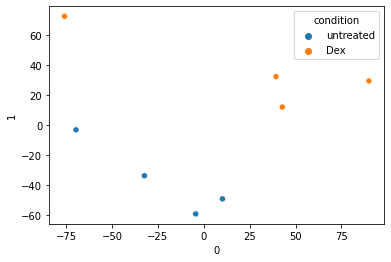

In [250]:
sns.scatterplot(data=pca_df, x='0', y='1', hue='condition')

In [402]:
untreated_counts = log_counts.loc[:,labels == 'untreated']

In [401]:
dex_counts = log_counts.loc[:,labels == 'Dex']

# Apply t-test

In [403]:
ttest_results = stats.ttest_ind(untreated_counts.T, dex_counts.T)
ttest_results = pd.DataFrame(ttest_results).T
ttest_results.columns = ['t_stat', 'p_value']
ttest_results.index = genes

In [404]:
ttest_results

,t_stat,p_value
Name,,
ENSG00000000003,1.583447,0.164409
ENSG00000000419,-0.190037,0.855546
ENSG00000000457,0.688527,0.516844
ENSG00000000460,0.421788,0.687874
ENSG00000000971,-0.531243,0.614333
...,...,...
ENSG00000273478,1.757689,0.129308
ENSG00000273483,-0.662877,0.532034
ENSG00000273486,0.822370,0.442314


- what is log fold change
- how to do multiple hypothesis correction
- what is -log10(p-value)?

In [405]:
log_fold_change = np.log2((dex_counts.mean(axis=1) + 1) / (untreated_counts.mean(axis=1) + 1))

In [406]:
log_fold_change.name = 'log2fc_untreated_to_dex'

In [407]:
diff_results = pd.concat([ttest_results, log_fold_change], axis=1)

In [408]:
diff_results['-log10_pvalue'] = -np.log10(diff_results['p_value'])

In [409]:
from statsmodels.stats.multitest import multipletests

In [410]:
mult_test_results = multipletests(diff_results['p_value'], alpha=0.05, method="fdr_bh")

In [411]:
diff_results['significant'] = mult_test_results[0]
diff_results['fdr'] = mult_test_results[1]

<AxesSubplot:xlabel='log2_untreated_to_dex', ylabel='-log10_pvalue'>

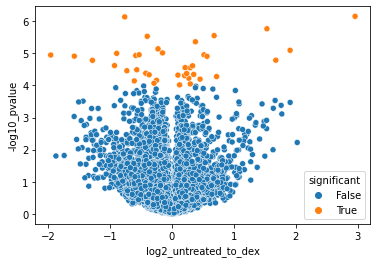

In [412]:
sns.scatterplot(data=diff_results, x='log2fc_untreated_to_dex', y='-log10_pvalue', hue='significant')

In [413]:
diff_results[diff_results['significant']].sort_values('p_value')

,t_stat,p_value,log2_untreated_to_dex,-log10_pvalue,significant,fdr
Name,,,,,,
ENSG00000179593,-21.243871,7.093209e-07,2.956889,6.149157,True,0.007442
ENSG00000255651,21.102740,7.379225e-07,-0.760300,6.131989,True,0.007442
ENSG00000143125,-18.275367,1.729037e-06,1.534181,5.762196,True,0.011624
ENSG00000152583,-16.819226,2.821854e-06,0.682315,5.549466,True,0.011966
ENSG00000134253,16.677051,2.966535e-06,-0.397408,5.527751,True,0.011966
ENSG00000101347,-15.606536,4.382410e-06,0.380904,5.358287,True,0.014728
ENSG00000155962,14.318544,7.261301e-06,-0.222770,5.138986,True,0.014728
ENSG00000013297,14.290824,7.344090e-06,-0.225630,5.134062,True,0.014728
ENSG00000250978,-14.059198,8.080481e-06,1.908446,5.092563,True,0.014728


# compare results to paper

In [441]:
# DUSP1, KLF15, PER1, TSC22D3, C7, CCDC69, CRISPLD2
abstract_genes = ['ENSG00000120129', 'ENSG00000163884', 'ENSG00000179094', 'ENSG00000157514', 'ENSG00000112936', 'ENSG00000198624', 'ENSG00000103196']
abstract_genes = set(abstract_genes)

In [440]:
sig_genes = diff_results.loc[diff_results['significant'] == True].index
sig_genes = set(sig_genes)

In [433]:
from matplotlib_venn import venn2

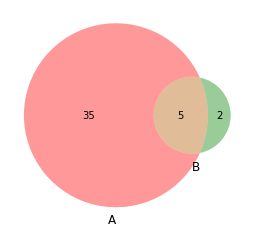

In [442]:
venn2([sig_genes, abstract_genes])

In [414]:
diff_results.loc[abstract_genes]

,t_stat,p_value,log2_untreated_to_dex,-log10_pvalue,significant,fdr
Name,,,,,,
ENSG00000120129,-11.612768,0.000025,0.334618,4.609964,True,0.023578
ENSG00000163884,-10.156722,0.000053,0.722676,4.275714,True,0.032393
ENSG00000179094,-9.835428,0.000064,0.455389,4.196111,True,0.036686
ENSG00000157514,-8.990793,0.000106,0.387661,3.975184,False,0.050845
ENSG00000112936,-3.681266,0.010315,0.407696,1.986525,False,0.263017
ENSG00000198624,-10.437449,0.000045,0.353148,4.343423,True,0.031046
ENSG00000103196,-11.337910,0.000028,0.296146,4.549930,True,0.024719
